<a href="https://colab.research.google.com/github/jwyeeh-dev/dacon-contest/blob/main/pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
train_df = pd.read_csv("/gdrive/My Drive/DACON/Computer_Vision_detection/dataset/train_df.csv", header=None)
print(train_df)

          0          1           2      3                4
0     index  file_name       class  state            label
1         0  10000.png  transistor   good  transistor-good
2         1  10001.png     capsule   good     capsule-good
3         2  10002.png  transistor   good  transistor-good
4         3  10003.png        wood   good        wood-good
...     ...        ...         ...    ...              ...
4273   4272  14272.png  transistor   good  transistor-good
4274   4273  14273.png  transistor   good  transistor-good
4275   4274  14274.png        grid   good        grid-good
4276   4275  14275.png      zipper   good      zipper-good
4277   4276  14276.png       screw   good       screw-good

[4278 rows x 5 columns]


In [ ]:
train_df = train_df.rename(columns = {0 : 'index', 1: 'file_name', 2 : 'class', 3: 'state', 4: 'label'})

In [ ]:
train_df = train_df.set_index('index')

In [ ]:
train_df = train_df.drop(['index'], axis = 0)

In [ ]:
train_df

,file_name,class,state,label
index,,,,
0,10000.png,transistor,good,transistor-good
1,10001.png,capsule,good,capsule-good
2,10002.png,transistor,good,transistor-good
3,10003.png,wood,good,wood-good
4,10004.png,bottle,good,bottle-good
...,...,...,...,...
4272,14272.png,transistor,good,transistor-good
4273,14273.png,transistor,good,transistor-good
4274,14274.png,grid,good,grid-good


In [ ]:
classList = train_df['class'].unique()
classList


array(['transistor', 'capsule', 'wood', 'bottle', 'screw', 'cable',
       'carpet', 'hazelnut', 'pill', 'metal_nut', 'zipper', 'leather',
       'toothbrush', 'tile', 'grid'], dtype=object)

In [ ]:
print('class 개수:', len(classList))

class 개수: 15


In [ ]:
labelList = train_df['label'].unique()
print('label 개수:', len(labelList))

label 개수: 88


In [ ]:
labelCount = train_df[['class', 'label']].groupby('label').count().rename(columns={'class': 'count'})
labelCount

,count
label,
bottle-broken_large,10
bottle-broken_small,11
bottle-contamination,11
bottle-good,209
cable-bent_wire,7
...,...
zipper-fabric_interior,8
zipper-good,240
zipper-rough,9


In [ ]:
anomaly_dict = {}
for className in classList:
    df = pd.DataFrame(labelCount[labelCount.index.str.contains(className)]).sort_values(by='count', ascending=False)
    anomaly_dict[className] = df

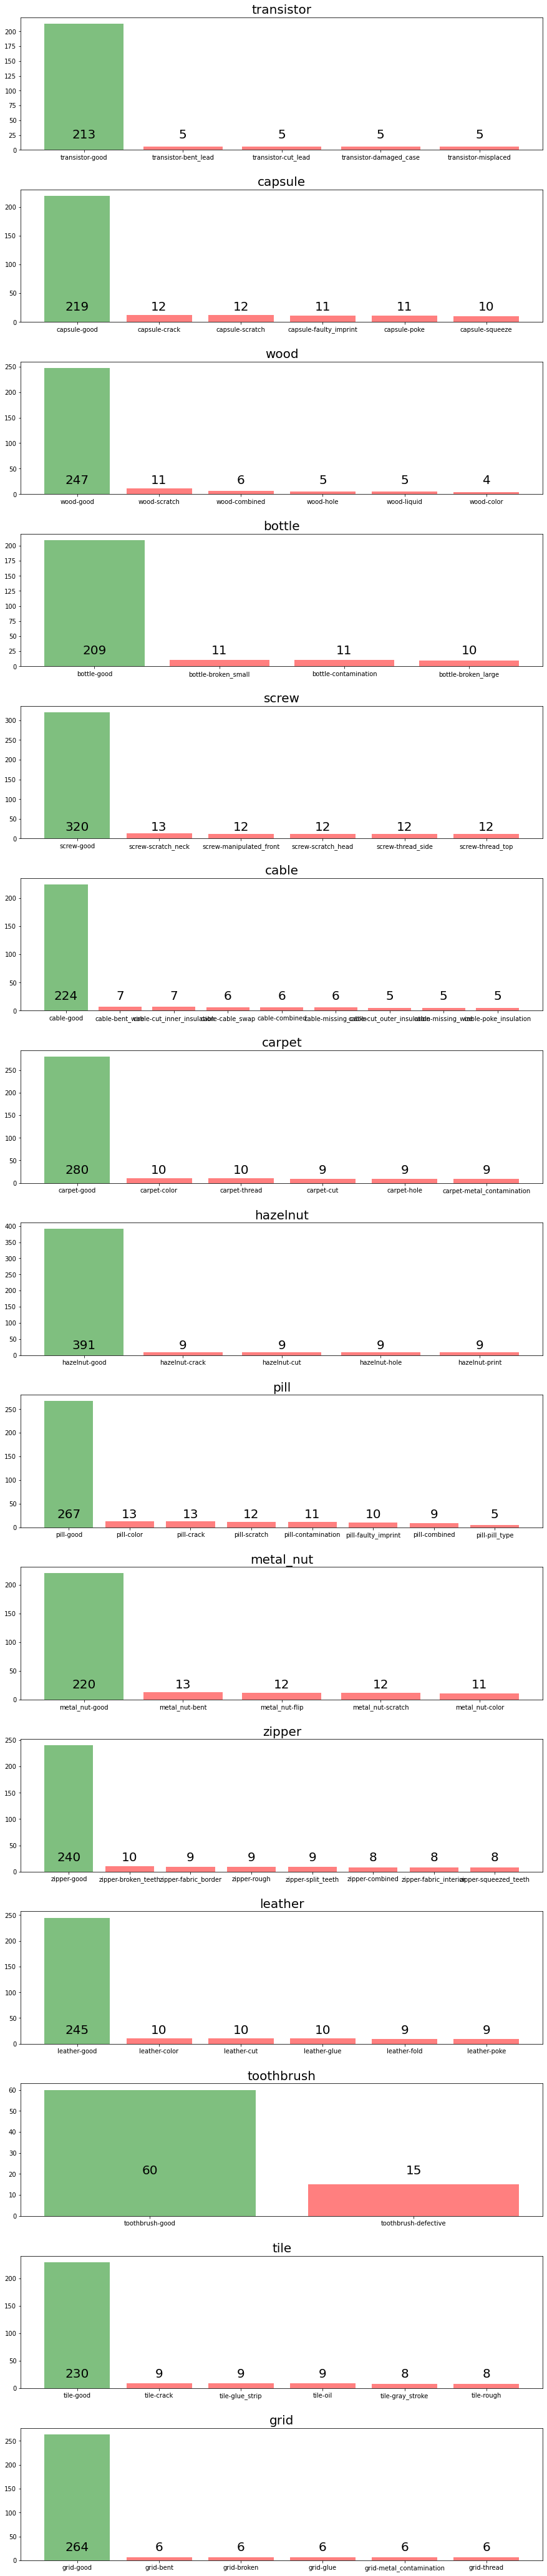

In [ ]:
fig, axs = plt.subplots(15, 1, figsize=(15, 15*5))
fig.subplots_adjust(hspace = .3)
axs = axs.ravel()

for i, (className, df) in enumerate(anomaly_dict.items()):
    colors = ['red' for i in range(len(df.index))]
    colors[0] = 'green'
    axs[i].bar(df.index, df.iloc[:, 0], color=colors, alpha=0.5)
    axs[i].set_title(className, fontsize=20)
    for j, value in enumerate(df.iloc[:, 0]):
        axs[i].text(j, 20, df.iloc[:, 0][j], ha='center', fontsize=20)